In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
def load_dataset(dataset_url: str, separator: str = '\s+', class_position: int = None, remove: list = None):
    """Load a dataset from a specified url into a pandas DataFrame.

    :param str dataset_url: an url from archive.ics.uci.edu
    :param str separator: file separator.
    :param int class_position: column index where classes are defined (starts by 0)
       if left empty (None), no prediction class will be used (intrinsic case).
    :param list remove: attributes indexes to remove.
    """
    # Load dataset as a pandas DataFrame from a specified url.
    dataset = pd.read_csv(dataset_url, sep=separator, header=None)

    # Extrinsic case, dataset comes with its classes.
    if class_position is not None:
        # Extract classes.
        classes = dataset.iloc[:, class_position]
        # Add class index to the indexes to remove.
        remove = [class_position] if remove is None else remove + [class_position]

    # Intrinsic case, dataset has no classes.
    else:
        classes = None

    # Remove noise attributes.
    if remove is not None:
        dataset.drop(remove, axis=1, inplace=True)

    # Force all values to be numeric.
    for (column, values) in dataset.iteritems():
        # Coerce transforms non-numeric values into NaN.
        dataset[column] = pd.to_numeric(values, errors='coerce')

    # Remove all NaN rows.
    # TODO: this might result in different classes vs attribute sizes. To be reviewed.
    dataset.dropna(inplace=True)

    return classes, dataset

In [4]:
dataset_url = 'http://cs.joensuu.fi/sipu/datasets/Aggregation.txt'
_, intrinsic_dataset = load_dataset(dataset_url)

In [13]:
intrinsic_dataset.describe()

,0,1,2
count,788.000000,788.000000,788.000000
mean,19.566815,14.171764,3.770305
std,9.922042,8.089683,1.596305
min,3.350000,1.950000,1.000000
25%,11.150000,7.037500,2.000000
50%,18.225000,11.725000,4.000000
75%,30.700000,21.962500,5.000000
max,36.550000,29.150000,7.000000


In [32]:
X_intr = np.array(intrinsic_dataset.loc[:,[0,1]])
y_intr = np.array(intrinsic_dataset.loc[:,2])

1. Definir un total de k centroides al azar.
2. Calcular las distancias de cada uno de los puntos de entrada a los k centroides, y asignar cada punto al centroide cuya distancia sea menor.
3. Actualizar la posición de los k centroides, calculando la posición promedio de todos los puntos que pertenecen a cada clase.
4. Repetir los pasos 2 y 3 hasta que los centroides no cambien de posición y, por lo tanto, las asignaciones de puntos entre clases no cambie.

A fin de implementar el modelo de K-Medios, comencemos por determinar la cantidad óptima de centroides a utilizar a partir del Método del Codo

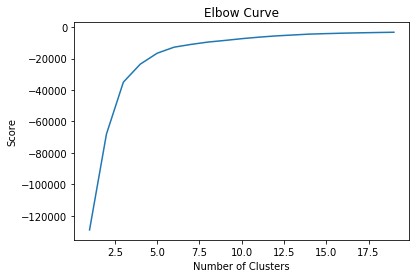

In [33]:
# Acumulamos valores de WCSS en función de la cantidad 
# de centroides k y lo representamos
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_intr).score(X_intr) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Consideramos 5 como valor para K.

In [59]:
# Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print('Los centros resultantes son:')
print(centroids)

Los centros resultantes son:
[[ 9.78540146  7.60656934]
 [33.14095238  8.85904762]
 [10.07759563 22.95163934]
 [30.62735849 22.35754717]
 [19.04068627  7.05906863]]


Los centros resultantes son:
[[ 9.81847826  7.59311594]
 [30.62735849 22.35754717]
 [33.14095238  8.85904762]
 [10.07759563 22.95163934]
 [19.0637931   7.06551724]]


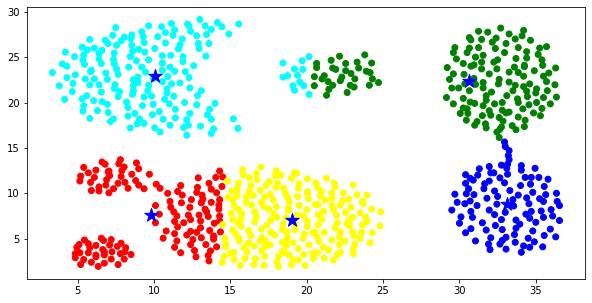

In [58]:
# Elegimos un número de clústeres a buscar
K = 5

# Getting the values and plotting it

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_intr[:,0],X_intr[:,1],c=asignar)
ax.scatter(centroids[:,0],centroids[:,1], marker='*', s=200, c='b')
